# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [93]:
# Your code here. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

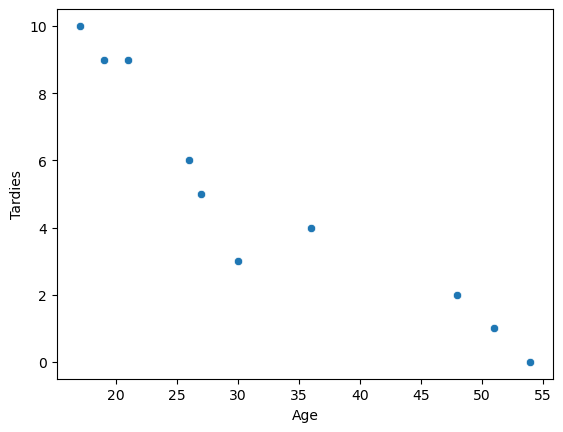

In [67]:
# Your code here.

sns.scatterplot(x=student_data['Age'], y=student_data['Tardies']);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [68]:
# Your response here. 

# the realtionship appears to be strongly negative - the older the student, the less tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [69]:
# Your response here.

np.cov(student_data['Age'], student_data['Tardies'], bias=True)[0][1]

# covariance is strongly negative

-41.01

In [70]:
corr = student_data.corr(method = 'pearson')
corr

# correlation is strongly negative

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [71]:
c = np.corrcoef(student_data['Age'],student_data['Tardies'])
c

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [72]:
y = student_data.Tardies

X = student_data[["Age"]]

In [73]:
linr_model = LinearRegression().fit(X, y)

linr_model

LinearRegression()

In [74]:
linr_model.coef_, linr_model.intercept_ 

(array([-0.24282077]), 12.888803363135768)

In [75]:
y = 0 + 1*X 

# 1-coeficient 0-intercept

In [76]:
# Your response here.

# 2 variables -> linear regression 

student_data["prediction"] = -0.24 * student_data.Age + 12.88

In [79]:
student_data["error"] = (student_data.prediction - student_data.Tardies).abs()


In [80]:
student_data

,Age,Tardies,prediction,error
0,17,10,8.80,1.20
1,51,1,0.64,0.36
2,27,5,6.40,1.40
3,21,9,7.84,1.16
4,36,4,4.24,0.24
5,48,2,1.36,0.64
6,19,9,8.32,0.68
7,26,6,6.64,0.64
8,54,0,-0.08,0.08
9,30,3,5.68,2.68


In [81]:
student_data.error.mean()

0.9079999999999998

Plot your regression model on your scatter plot.

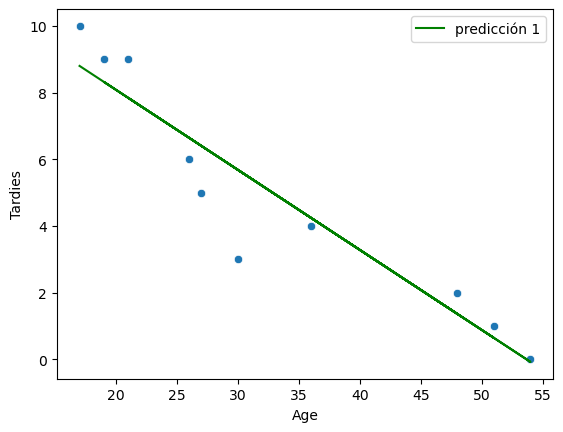

In [78]:
# Your code here.

sns.scatterplot(x=student_data['Age'], y=student_data['Tardies'])
plt.plot(student_data.Age, student_data.prediction, label="predicción 1", c="g")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

# Age is a good predictor of tardies - with strong negative correlation. The older the student, the lower are tardies.
# Average error of our prediction is 0.9 - on average we'll make a mistake of 1 event when predicting tardies

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [84]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [87]:
# Your response here. 

c1 = np.corrcoef(vehicles["Year"],vehicles['CO2 Emission Grams/Mile'])
c1

array([[ 1.       , -0.2222996],
       [-0.2222996,  1.       ]])

In [89]:
c2 = np.corrcoef(vehicles["Cylinders"],vehicles['CO2 Emission Grams/Mile'])
c2

array([[1.        , 0.75239255],
       [0.75239255, 1.        ]])

In [90]:
c3 = np.corrcoef(vehicles["Fuel Barrels/Year"],vehicles['CO2 Emission Grams/Mile'])
c3

array([[1.        , 0.98618866],
       [0.98618866, 1.        ]])

In [91]:
c4 = np.corrcoef(vehicles["Combined MPG"],vehicles['CO2 Emission Grams/Mile'])
c4

array([[ 1.        , -0.92622904],
       [-0.92622904,  1.        ]])

In [92]:
c5 = np.corrcoef(vehicles["Fuel Cost/Year"],vehicles['CO2 Emission Grams/Mile'])
c5

array([[1.        , 0.93086515],
       [0.93086515, 1.        ]])

In [ ]:
# strong positive correlation: Fuel Cost/Year, Fuel Barrels/Year
# medium positive correlation: Cylinders
# strong negative correlation: Combined MPG
# least important: Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [96]:
data = vehicles

In [100]:
# Your response here.

# Multiple Linear Regression

results = smf.ols("vehicles['CO2 Emission Grams/Mile'] ~ vehicles['Fuel Cost/Year'] + vehicles['Fuel Barrels/Year']", data=data).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles['CO2 Emission Grams/Mile']   R-squared:                       0.977
Model:                                             OLS   Adj. R-squared:                  0.977
Method:                                  Least Squares   F-statistic:                 7.708e+05
Date:                                 Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                                         13:33:51   Log-Likelihood:            -1.5487e+05
No. Observations:                                35952   AIC:                         3.098e+05
Df Residuals:                                    35949   BIC:                         3.098e+05
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        10.0210      0.387     25.924      0.000       9.263      10.779
vehicles['Fuel Cost/Year']        0.0399      0.000     85.609      0.000       0.039       0.041
vehicles['Fuel Barrels/Year']    22.1302      0.053    417.913      0.000      22.026      22.234
==============================================================================
Omnibus:                    78651.444   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        451445567.696
Skew:                          20.059   Prob(JB):                         0.00
Kurtosis:                     550.500   Cond. No.                     8.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# R2: 0.97 - the variables explain 92% of result
# intercept: coef 10.02, std err 0.387

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 